# Implementing the ISA atmospheric model

The International Standard Atmosphere (ISA) is a standard model that describes the variation of atmospheric properties with altitude worldwide. The model was developed by the International Civil Aviation Organization (ICAO) and is widely used in aviation and aeronautical engineering to estimate the behavior of airplanes and other aerial vehicles at different altitudes.

The ISA model is based on a series of assumptions and definitions, including a standard temperature, pressure, and density at sea level. According to the model, the temperature decreases at a constant rate of 6.5 degrees Celsius per 1000 meters of altitude increase, up to an altitude of 11 km. From there, the temperature remains constant up to 20 km altitude, after which it begins to increase at a constant rate. Pressure decreases exponentially with altitude, and density is calculated from pressure and temperature.

It is important to note that the ISA model is a simplification of the real atmosphere, and that actual atmospheric conditions can vary significantly from the model predictions depending on location, weather, and other factors. Additionally, the ISA model applies only to standard conditions at sea level, and may require adjustments for use at other altitudes or situations.

> COESA 1976: https://www.ngdc.noaa.gov/stp/space-weather/online-publications/miscellaneous/us-standard-atmosphere-1976/us-standard-atmosphere_st76-1562_noaa.pdf


![COESA 1976](https://m.media-amazon.com/images/W/IMAGERENDERING_521856-T1/images/I/91OMgjZp-6L._AC_UF1000,1000_QL80_.jpg)

## Declaring the constants

In [1]:
P0 = 101325 # sea level standard atmospheric pressure in Pa
L = 0.0065 # standard atmospheric lapse rate in K/m
T0 = 288.15 # sea level standard temperature in K
g = 9.80665 # standard acceleration due to gravity in m/s^2
M = 0.0289644 # molar mass of dry air in kg/mol
R = 8.31447 # universal gas constant in J/(mol*K)
R_spec = 287.058 # specific gas constant for dry air in J/(kg*K)

## Computing the temperature at a given altitude

In [2]:
def temperature_at_altitude(altitude):
    """Returns the atmospheric temperature at a given altitude in meters above sea level.
    
    Parameters
    ----------
    altitude : float
        Altitude in meters.

    Notes
    -----
    Formula used: T = T0 - L * h
    
    """
    h = altitude
    T = T0 - L * h
    return T

## Computing the pressure at a given altitude

In [3]:
def pressure_at_altitude(altitude):
    """Returns the atmospheric pressure at a given altitude in meters above sea level.
    
    Parameters
    ----------
    altitude : float
        Altitude value in meters.

    Notes
    -----    
    Formula used: P = P0 * (1 - L * h / T0) ** (g * M / R * L)
    
    """
    h = altitude
    T = T0 - L * h
    P = P0 * (1 - L * h / T0) ** (g * M / (R * L))
    return P

## Computing the density at a given altitude

In [4]:
def density_at_altitude(altitude):
    """Returns the atmospheric density at a given altitude in meters above sea level.
    
    Parameters
    ----------
    altitude : float
        Altitude in meters.

    Notes
    -----
    Formula used: rho = P / (R_spec * T)
    
    """
    P = pressure_at_altitude(altitude)
    T = temperature_at_altitude(altitude)
    rho = P / (R_spec * T)
    return rho

## Computing all properties at a given altitude

In [5]:
def properties_at_altitude(altitude):
    """Returns the atmospheric properties at a given altitude in meters above sea level.
    
    Parameters
    ----------
    altitude : float
        Altitude in meters.
   
    """
    P = pressure_at_altitude(altitude)
    T = temperature_at_altitude(altitude)
    rho = density_at_altitude(altitude)
    return T, P, rho

## Computing data for various altitudes

It is enough to use a loop that iterates over various altitude values within the limits of the atmospheric model.

In [6]:
altitudes = range(0, 11000, 1000)
temperatures, pressures, densities = [], [], []

for altitude in altitudes:
    T, P, rho = properties_at_altitude(altitude)
    print(f"{altitude = :5.0f}\t{T = :5.2f}\t{P = :7.0f}\t{rho = :4.3f}")
    
    temperatures.append(T)
    pressures.append(P)
    densities.append(rho)

altitude =     0	T = 288.15	P =  101325	rho = 1.225
altitude =  1000	T = 281.65	P =   89875	rho = 1.112
altitude =  2000	T = 275.15	P =   79496	rho = 1.006
altitude =  3000	T = 268.65	P =   70109	rho = 0.909
altitude =  4000	T = 262.15	P =   61641	rho = 0.819
altitude =  5000	T = 255.65	P =   54021	rho = 0.736
altitude =  6000	T = 249.15	P =   47182	rho = 0.660
altitude =  7000	T = 242.65	P =   41061	rho = 0.590
altitude =  8000	T = 236.15	P =   35600	rho = 0.525
altitude =  9000	T = 229.65	P =   30743	rho = 0.466
altitude = 10000	T = 223.15	P =   26437	rho = 0.413


## Visualizing the properties VS altitude using Matplotlib

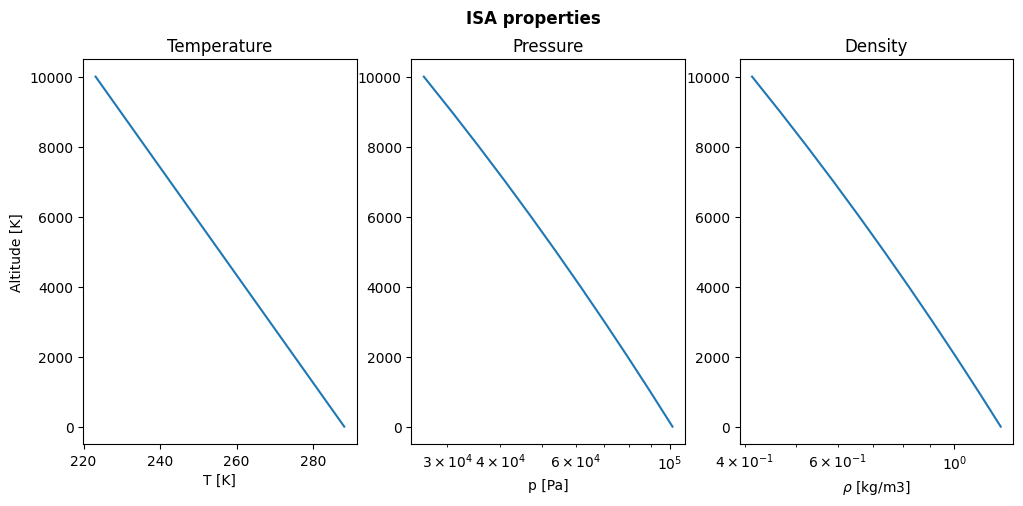

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle("ISA properties", fontweight="bold")

# Temperature plot
axs[0].set_title("Temperature")
axs[0].set_xlabel("T [K]")
axs[0].set_ylabel("Altitude [K]")
axs[0].plot(temperatures, altitudes)

# Pressure plot
axs[1].set_title("Pressure")
axs[1].set_xlabel("p [Pa]")
axs[1].plot(pressures, altitudes)
axs[1].set_xscale("log")

# Density plot
axs[2].set_title("Density")
axs[2].set_xlabel(r"$\rho$ [kg/m3]")
axs[2].plot(densities, altitudes)
axs[2].set_xscale("log")